In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = sns.load_dataset("titanic")


In [3]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
m = pd.DataFrame({
    "missing_count":df.isnull().sum(),
    "missing_per":(df.isnull().sum()/len(df))*100
})


In [13]:
m.sort_values(by = "missing_per",ascending = False)

,missing_count,missing_per
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


In [14]:
df["age"] = df["age"].fillna(df["age"].mean())

In [22]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [23]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [27]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [28]:
m = pd.DataFrame({
    "missing_count":df.isnull().sum(),
    "missing_per":(df.isnull().sum()/len(df))*100
})


In [29]:
m.sort_values(by = "missing_per",ascending = False)

,missing_count,missing_per
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,0,0.000000
class,0,0.000000


In [30]:
df.duplicated().sum()

111

In [33]:
df["class"] = df["class"].astype("category")
df["sex"] = df["sex"].astype("category")
df["embarked"] = df["embarked"].astype("category")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


In [35]:
num_cols = df.select_dtypes(include = ["float64","int64"]).columns
df[num_cols].describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Age distribution of passengers')

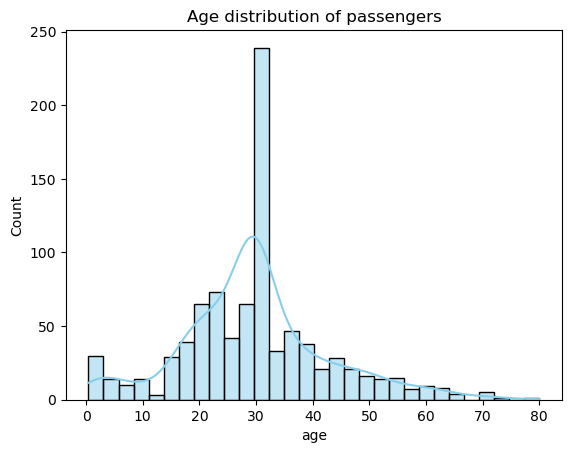

In [37]:
#univariate ->numerical

sns.histplot(df["age"],bins=30,kde= True,color = "skyblue")
plt.title("Age distribution of passengers")


Text(0.5, 1.0, 'Fare distribution with outliers')

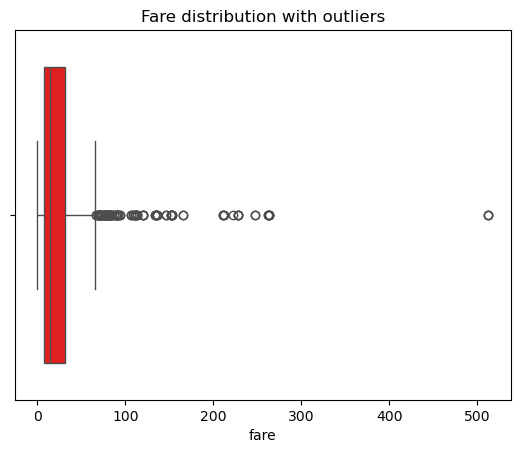

In [41]:
sns.boxplot(x=df["fare"],color = "red")
plt.title("Fare distribution with outliers")

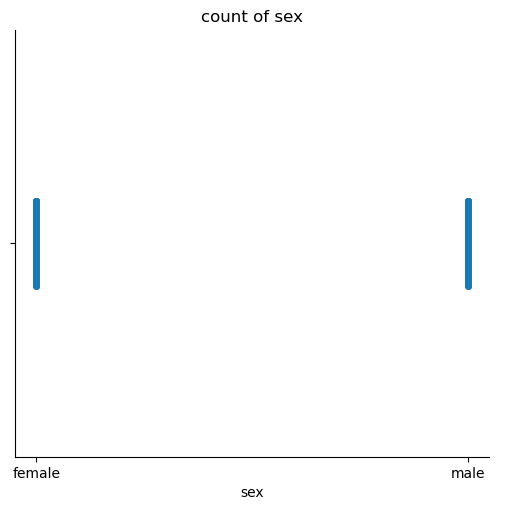

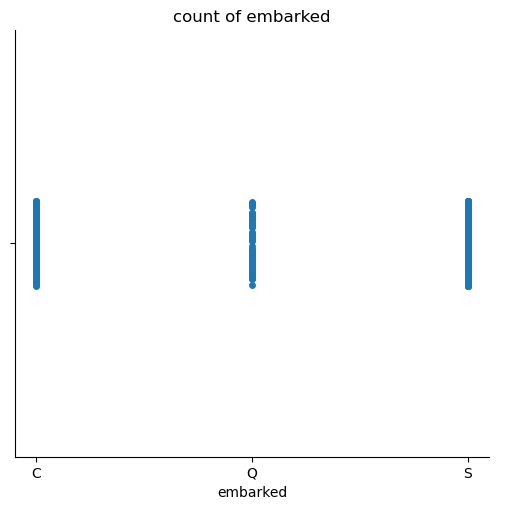

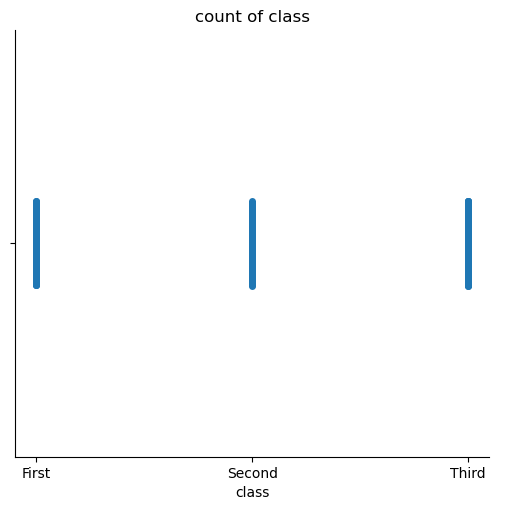

In [43]:
#univariate ->categorical

cat_cols = df.select_dtypes("category").columns
for col in cat_cols:
    sns.catplot(x=col,data =df)
    plt.title(f"count of {col}")

Text(0.5, 1.0, 'Fare by class')

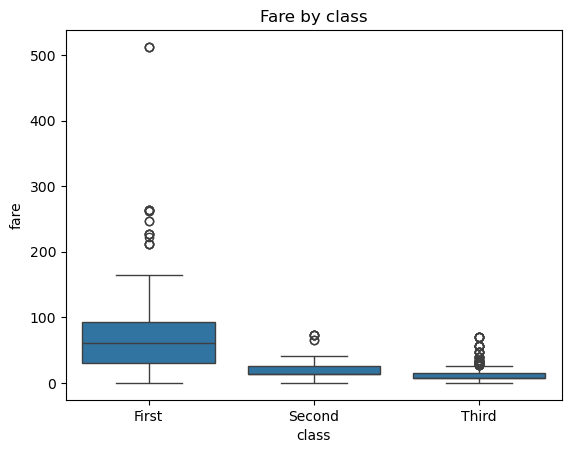

In [44]:
#bivariate ->numerical vs categorical

sns.boxplot(x = "class",y = "fare",data = df)
plt.title("Fare by class")

Text(0.5, 1.0, 'Age by Gender')

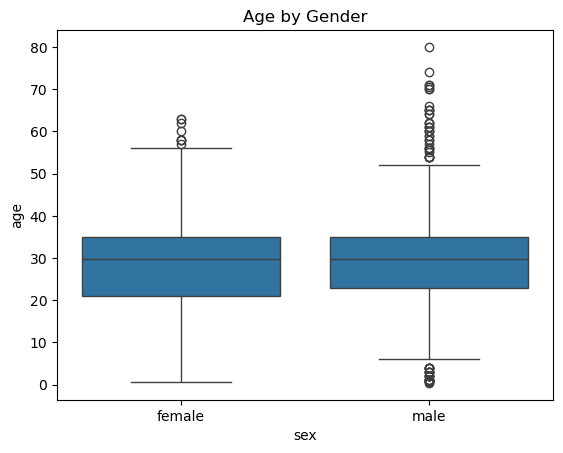

In [45]:
sns.boxplot(x = "sex",y = "age",data =df)
plt.title("Age by Gender")

Text(0.5, 1.0, 'Survival count by gender')

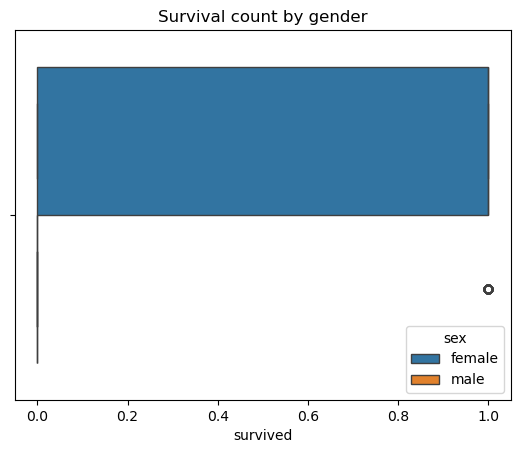

In [46]:
#bivariate ->categorical vs categorical

sns.boxplot(x = "survived",hue = "sex",data = df)
plt.title("Survival count by gender")

Text(0.5, 1.0, 'survival count by class')

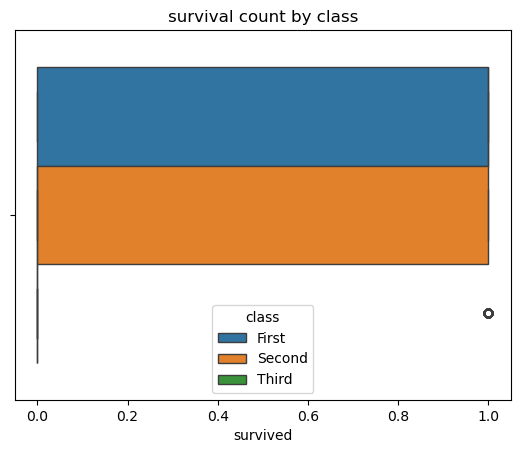

In [47]:
sns.boxplot(x = "survived",hue = "class",data = df)
plt.title("survival count by class")

Text(0.5, 1.0, 'correlation heatmap')

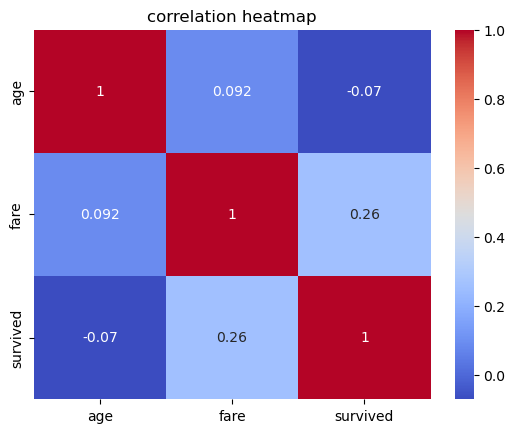

In [49]:
#correlation and multivariate analysis

corr = df[["age","fare","survived"]].corr()
sns.heatmap(corr,annot = True,cmap = "coolwarm")
plt.title("correlation heatmap")


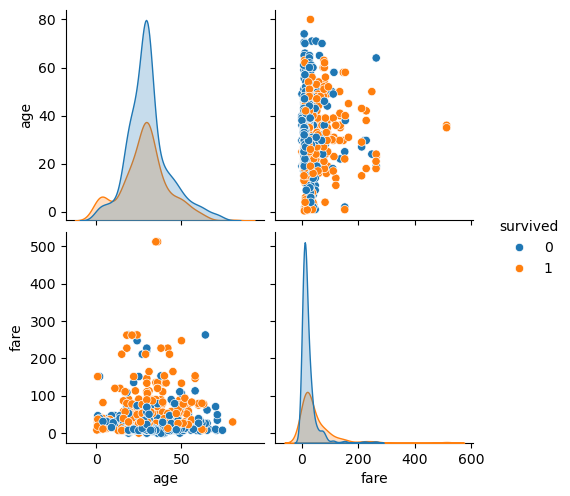

In [50]:
sns.pairplot(df[["age","fare","survived"]],hue = "survived")


In [53]:
#outlier detection using IQR
q1 = df["fare"].quantile(0.25)
q3 = df["fare"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

outliers = df[(df["fare"]<lower) | (df["fare"]>upper)]
print(len(outliers))

116


Text(0.5, 1.0, 'Fare after outlier capping')

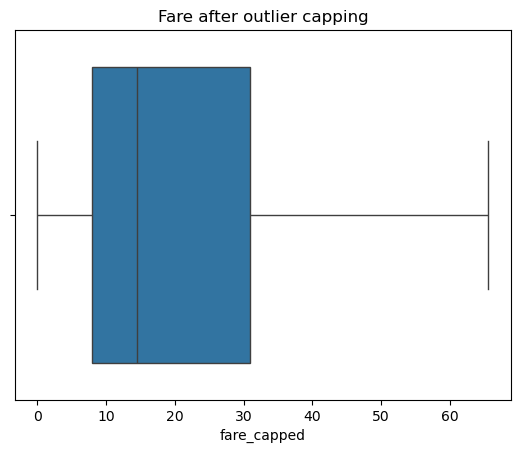

In [55]:
#OUTLIERS

df["fare_capped"] = df["fare"].clip(lower,upper)
sns.boxplot(x = df["fare_capped"])
plt.title("Fare after outlier capping")